In [1]:
import matplotlib.pyplot as plt
import numpy as np
from copy import deepcopy
from typing import List, Iterable

# Using karpathy/micrograd to work with gradients. Thanks Andrej!  
from micrograd.engine import Value

In [2]:
# Generate some clustery-looking data
target_slope = 0.5
target_intercept = 3

np.random.seed(2023)
rng = np.random.default_rng(2023)

X1_c1 = rng.normal(loc=4.0, scale=1.3, size=1000)
X2_c1 = rng.normal(loc=9.0, scale=2.0, size=1000)

X1_c2 = rng.normal(loc=10.0, scale=1.3, size=1000)
X2_c2 = rng.normal(loc=4.0, scale=1.3, size=1000)

X1_c3 = rng.normal(loc=11.0, scale=1.0, size=1000)
X2_c3 = rng.normal(loc=11.0, scale=1.0, size=1000)

In [3]:
# Concatenate all of the datapoints together 
c1 = np.column_stack([X1_c1, X2_c1])
c2 = np.column_stack([X1_c2, X2_c2])
c3 = np.column_stack([X1_c3, X2_c3])
data = np.concatenate([c1, c2, c3])

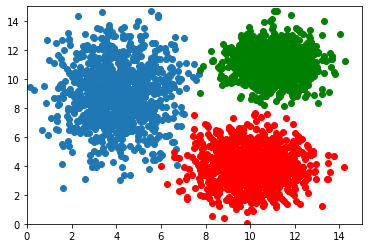

In [4]:
plt.scatter(X1_c1, X2_c1)
plt.scatter(X1_c2, X2_c2, c='red')
plt.scatter(X1_c3, X2_c3, c='green')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()

In [5]:
class KMeans:
    def __init__(self, k):
        self.k = k
        self.centroids = []
        self.tol = 1e-3
        
    # Euclidean distance between 2 points
    def distance(self, 
                 coord1: Iterable,
                 coord2: Iterable) -> Value:
        assert len(coord1) == len(coord2)
        result = 0
        for dim in range(len(coord1)):
            result += (coord1[dim] - coord2[dim])**2 
        return result
    
    # Use current parameters to produce predictions
    def fit(self, data: Iterable) -> Iterable:
        # initialize centroids from random data points  
        idx = np.random.randint(low=0, high=data.shape[0], size=self.k)
        self.centroids = data[idx]
        converged = False
        
        iterations = {}
        iter_counter = 0
        while not converged: 
            # Assign each sample to the closest cluster
            labels = []
            for data_point in data: 
                dist = []
                for centroid in self.centroids:
                    dist.append(self.distance(data_point, centroid))
                labels.append(np.argmin(dist))
                
            # Get indices of data points assigned to each cluster
            cluster_dict = {} 
            for idx, item in enumerate(labels):
                if item in cluster_dict.keys():
                    cluster_dict[item].append(idx) 
                else: 
                    cluster_dict[item] = [idx]
                
            # Compute the new centroids by taking the average of all data points assigned to that cluster
            changes = []
            for idx, centroid_coords in enumerate(self.centroids):
                new_coords = np.mean(data[cluster_dict[idx]], axis=0)
                changes.append(self.distance(self.centroids[idx], new_coords))
                self.centroids[idx] = np.mean(data[cluster_dict[idx]], axis=0)
            print(changes)
            
            iterations[iter_counter] = deepcopy(self.centroids)
            iter_counter += 1 
                
            # Stop the computation if the centroid moved less than tol                     
            if all(change < self.tol for change in changes):
                converged = True
                
        return iterations

In [6]:
kmeans = KMeans(k=3)

In [7]:
kmeans.fit(data)

[2.1584645629778194, 6.911075911258241, 1.1159919808581906]
[0.009289299090252773, 0.09164936896667862, 0.01800499060523414]
[0.0002824455363018173, 0.0003531855977459725, 8.454998502593437e-05]


{0: array([[ 4.03747827,  8.9857515 ],
        [10.04273357,  4.27579384],
        [11.10073602, 11.16502982]]),
 1: array([[ 3.98260886,  9.06498941],
        [ 9.95993549,  3.98460001],
        [11.03293149, 11.0492389 ]]),
 2: array([[ 3.97703121,  9.08084297],
        [ 9.94307517,  3.97629848],
        [11.0283827 , 11.04124775]])}

In [8]:
kmeans.centroids

array([[ 3.97703121,  9.08084297],
       [ 9.94307517,  3.97629848],
       [11.0283827 , 11.04124775]])

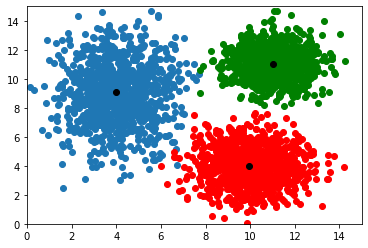

In [9]:
plt.scatter(X1_c1, X2_c1)
plt.scatter(X1_c2, X2_c2, c='red')
plt.scatter(X1_c3, X2_c3, c='green')
plt.scatter(kmeans.centroids[:, 0],  kmeans.centroids[:, 1], c='black')
plt.xlim(0, 15)
plt.ylim(0, 15)
plt.show()